### Building & Zoning Permits

In [1]:
import requests
import pandas as pd
from pandas import json_normalize
pd.set_option("display.max.columns", None)

base_url = "https://phl.carto.com/api/v2/sql"
query = """
SELECT * FROM permits
"""

params = {
    "q":query
}

results = requests.get(base_url, params)

data = results.json()

permits = pd.DataFrame(data['rows'])

permits.head()

cartodb_id                                           the_geom  \
0           1  0101000020E6100000B952A8FFC3CA52C0691B02E152FA...   
1           2  0101000020E61000007F05CEE474C552C0C81EB146AA04...   
2           3  0101000020E6100000159ED4D07BC752C09096F2A452FC...   
3           4  0101000020E6100000A2A810F125CA52C01A17C25156F6...   
4           5  0101000020E6100000033321CF3DCB52C0D4A44884C1F8...   

                                the_geom_webmercator  objectid  \
0  0101000020110F00000D791ECB91EB5FC1E390D20A9B89...         1   
1  0101000020110F0000AACA8D378DE25FC15CD034FF1195...         2   
2  0101000020110F0000D7E17FA8FEE55FC12327DC1FD28B...         3   
3  0101000020110F00008D86555185EA5FC1C44D888E3085...         4   
4  0101000020110F0000726C62B360EC5FC194522B63DE87...         5   

     permitnumber addressobjectid parcel_id_num            permittype  \
0  CP-2022-001232       133893300        420049              Building   
1  GM-2024-008835       130572974        367650  General Permit Minor   
2  PP-2020-013920       128407555        530784              Plumbing   
3  PP-2021-003762        15415193        467000              Plumbing   
4  RP-2022-010840        15383756        202367  Residential Building   

             permitdescription commercialorresidential  \
0   Commercial Building Permit              Commercial   
1         General Permit Minor             Residential   
2              Plumbing Permit             Residential   
3              Plumbing Permit             Residential   
4  Residential Building Permit             Residential   

                      typeofwork  \
0     Addition and/or Alteration   
1   EZ Roof Covering Replacement   
2  New Construction or Additions   
3  New Construction or Additions   
4     Addition and/or Alteration   

                                 approvedscopeofwork       permitissuedate  \
0  Repair concrete spalls on columns and balcony ...  2022-04-04T04:00:00Z   
1  For minor construction work at the subject pro...  2024-10-02T04:00:00Z   
2  ERECTION OF AN ATTACHED STRUCTURE FOR USE AS T...  2022-06-21T04:00:00Z   
3  FOR THE ERECTION OF AN ATTACHED THREE STORY ST...  2021-08-03T04:00:00Z   
4  For the erection of an addition to an existing...  2023-01-19T05:00:00Z   

                             status                applicanttype  \
0  Amendment Application Incomplete  Professional / Tradesperson   
1                            Issued  Professional / Tradesperson   
2                         Completed  Professional / Tradesperson   
3                         Completed  Professional / Tradesperson   
4                         Completed  Professional / Tradesperson   

                    contractorname  \
0                      Pullman SST   
1                             None   
2       UNITED STATES PLUMBING LLC   
3  FERKO PLUMBING & HEATING CO INC   
4              DETAIL EXCHANGE LLC   

                                  contractoraddress1 contractoraddress2  \
0  Pullman SST\r\n179 PENNSYLVANIA AVE\r\nMALVERN...               None   
1                                               None               None   
2  UNITED STATES PLUMBING LLC\r\n1651OLD GRADYVIL...               None   
3  FERKO PLUMBING & HEATING CO INC\r\n2642 Mercer...               None   
4  DETAIL EXCHANGE LLC\r\n136 PITMAN DOWNER RD\r\...               None   

  contractorcity contractorstate contractorzip        mostrecentinsp  \
0           None            None          None  2024-04-01T18:40:05Z   
1           None            None          None  2024-10-17T12:28:01Z   
2           None            None          None  2023-06-12T14:27:41Z   
3           None            None          None  2022-01-19T13:37:09Z   
4           None            None          None  2023-09-08T18:09:18Z   

  opa_account_num                         address unit_type unit_num  \
0       883720300  1700-20 BENJAMIN FRANKLIN PKWY      None     None   
1       531269600               6005 FRONTENAC ST      No

In [10]:
print("\nCoordinate ranges:")
print("geocode_x range:", permits['geocode_x'].min(), "to", permits['geocode_x'].max())
print("geocode_y range:", permits['geocode_y'].min(), "to", permits['geocode_y'].max())
# Pennslyvania state plane baby!


Coordinate ranges:
geocode_x range: 2662243.133715 to 2749427.87880706
geocode_y range: 207590.2231899 to 304695.42609222


In [11]:
print("Available columns:", permits.columns.tolist())

Available columns: ['cartodb_id', 'the_geom', 'the_geom_webmercator', 'objectid', 'permitnumber', 'addressobjectid', 'parcel_id_num', 'permittype', 'permitdescription', 'commercialorresidential', 'typeofwork', 'approvedscopeofwork', 'permitissuedate', 'status', 'applicanttype', 'contractorname', 'contractoraddress1', 'contractoraddress2', 'contractorcity', 'contractorstate', 'contractorzip', 'mostrecentinsp', 'opa_account_num', 'address', 'unit_type', 'unit_num', 'zip', 'censustract', 'council_district', 'opa_owner', 'systemofrecord', 'geocode_x', 'geocode_y', 'posse_jobid', 'usecategories', 'occupancytype', 'numberofunits', 'certificateofoccupancyrequired', 'certificateofoccupancydate', 'permitcompleteddate']


'permitdescription', 'commercialorresidential', and 'typeofwork' are the columns of interest. Filtering these will show residential zoning permits where the permit is seeking a "change of use." While not a variance, seeing areas with lots of these might allude to an increasingly residential area which could signify housing demand. 

In [12]:
# Filtering for residential zoning permits specifically & the type of permit being a change of use permit
permits = permits[
    (permits['permitdescription'] == 'Zoning Permit') & 
    (permits["commercialorresidential"] == "Residential") & 
    (permits["typeofwork"] == "Change of Use")
]

permits = permits[
    (permits["approvedscopeofwork"].str.contains("Two-Family", na=False)) |
    (permits["approvedscopeofwork"].str.contains("Multi-Family", na=False))
]

permits.head()

cartodb_id                                           the_geom  \
24           25  0101000020E6100000891E51A5ACC952C045454631D4FE...   
49           50  0101000020E6100000913BEE109FC952C0FAA6B5A457FF...   
331         332  0101000020E61000000225772F8BC952C018836E8ABD03...   
508         509  0101000020E61000006F1A113AA2CF52C0E48B7F2CC5F9...   
718         719  0101000020E610000029D29B5171C852C0ABC45911E8FD...   

                                  the_geom_webmercator  objectid  \
24   0101000020110F000095A8D048B7E95FC16E9A6033998E...        24   
49   0101000020110F000090BAD237A0E95FC14F2C3EEC2A8F...        48   
331  0101000020110F00006EB9DA727EE95FC1F7DCF7670B94...       322   
508  0101000020110F000090CD2AA3D6F35FC1BB780A0BFE88...       496   
718  0101000020110F00002F3D79AB9FE75FC1748E5076938D...       698   

       permitnumber addressobjectid parcel_id_num permittype  \
24   ZP-2022-010981       129462594        392740     Zoning   
49   ZP-2021-011337        15843999         73570     Zoning   
331  ZP-2021-011261        15518665        533734     Zoning   
508  ZP-2023-002012       137339794        355207     Zoning   
718  ZP-2022-001364       133183014        477231     Zoning   

    permitdescription commercialorresidential  ... systemofrecord  \
24      Zoning Permit             Residential  ...        ECLIPSE   
49      Zoning Permit             Residential  ...        ECLIPSE   
331     Zoning Permit             Residential  ...        ECLIPSE   
508     Zoning Permit             Residential  ...        ECLIPSE   
718     Zoning Permit             Residential  ...        ECLIPSE   

        geocode_x      geocode_y posse_jobid  \
24   2.696584e+06  250238.383135   522483251   
49   2.696773e+06  251705.926768   391789336   
331  2.696744e+06  264227.139090   390946715   
508  2.670913e+06  235093.508733   569577537   
718  2.702052e+06  247773.795718   440351614   

                                   usecategories occupancytype numberofunits  \
24   Residential - Household Living - Two-Family          None           NaN   
49   Residential - Household Living - Two-Family          None           NaN   
331  Residential - Household Living - Two-Family          None           NaN   
508  Residential - Household Living - Two-Family          None           NaN   
718  Residential - Household Living - Two-Family          None           NaN   

    certificateofoccupancyrequired certificateofoccupancydate  \
24                            None                       None   
49                            None                       None   
331                           None                       None   
508                           None                       None   
718                           None                       None   

    permitcompleteddate  
24                 None  
49                 None  
331                None  
508                None  
718                None  

[5 rows x 40 columns]

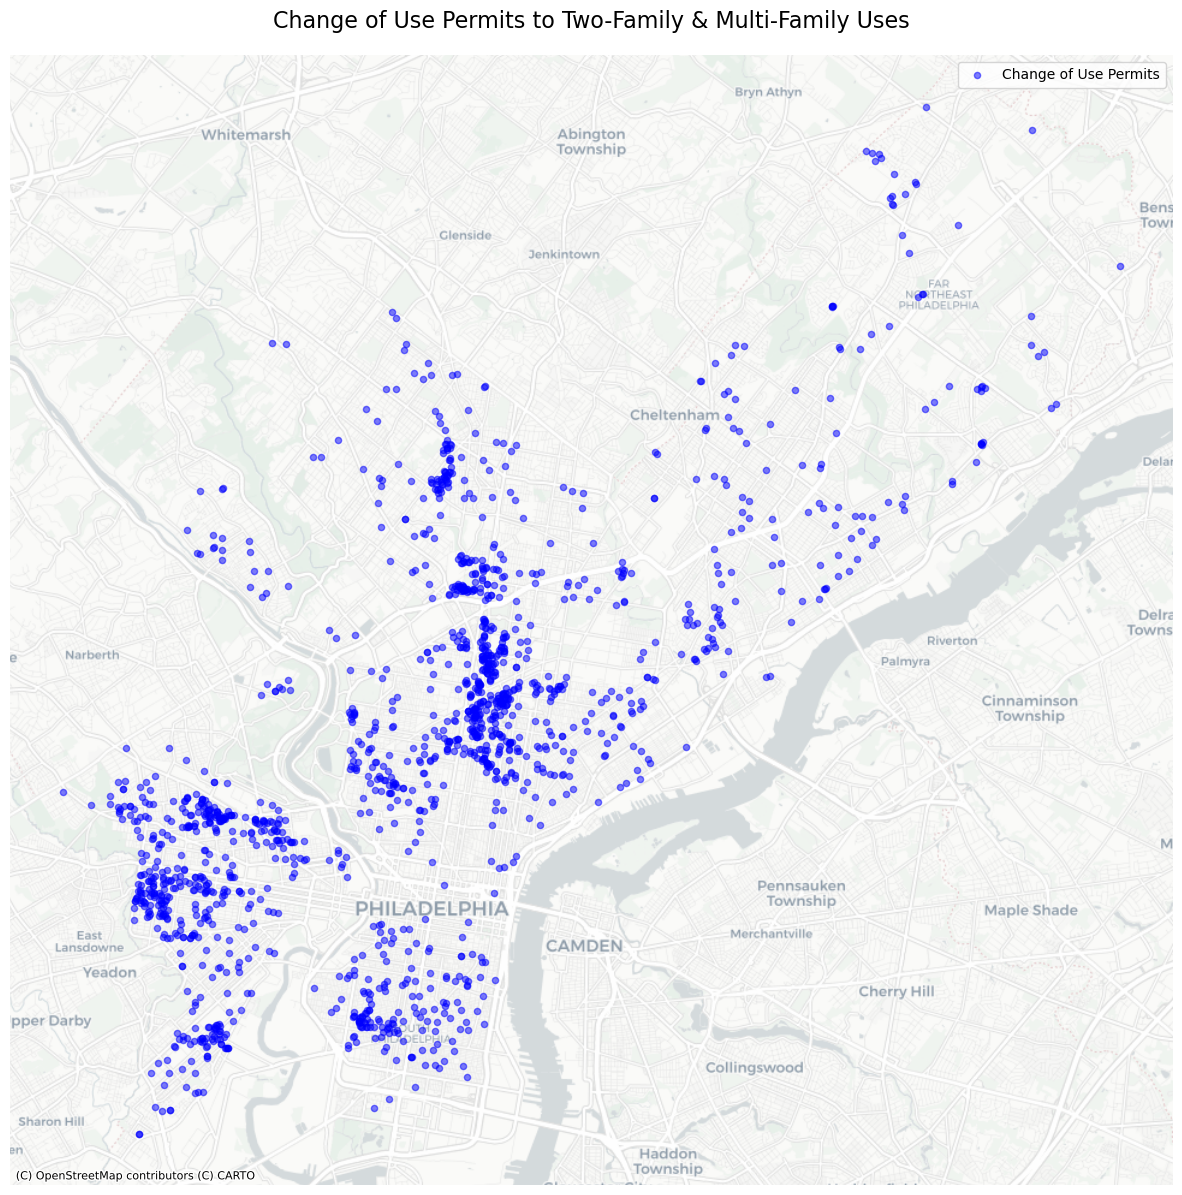

In [13]:
import geopandas as gpd
from pyproj import Transformer
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

# Transformer from PA State Plane to WGS84 (lat/long)
transformer = Transformer.from_crs("EPSG:2272", "EPSG:4326", always_xy=True)

permits['longitude'], permits['latitude'] = transformer.transform(
    permits['geocode_x'].values, 
    permits['geocode_y'].values
)

geometry = [Point(xy) for xy in zip(permits['longitude'], permits['latitude'])]
gdf = gpd.GeoDataFrame(permits, geometry=geometry, crs="EPSG:4326")

fig, ax = plt.subplots(figsize=(15, 15))

gdf_web = gdf.to_crs(epsg=3857)

gdf_web.plot(ax=ax, 
             alpha=0.5, 
             c='blue',
             markersize=20,
             label='Change of Use Permits')

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Plot customization
plt.title('Change of Use Permits to Two-Family & Multi-Family Uses', fontsize=16, pad=20)
ax.set_axis_off()
plt.legend()

plt.show()

# Years are from 2018-2024

In [14]:
districts = gpd.read_file('https://opendata.arcgis.com/api/v3/datasets/1ba5a5d68f4a4c75806e78b1d9245924_0/downloads/data?format=geojson&spatialRefId=4326&where=1%3D1')

In [15]:
districts.head()

OBJECTID_1  OBJECTID DISTRICT     SHAPE_LENG   Shape__Area  Shape__Length  \
0           1         1        1  107319.271435  4.017231e+07   42704.277559   
1           2         2        2  163242.842040  9.866933e+07   64896.883391   
2           3         3        3   92775.194649  3.661869e+07   36906.652590   
3           4         4        4  168377.290984  9.164117e+07   67040.969970   
4           5         5        5   96790.499546  3.095135e+07   38537.014107   

                                            geometry  
0  POLYGON ((-75.11357 39.99447, -75.11272 39.993...  
1  POLYGON ((-75.17260 39.94874, -75.17103 39.948...  
2  POLYGON ((-75.20436 39.97443, -75.20372 39.974...  
3  POLYGON ((-75.23050 40.08271, -75.23036 40.082...  
4  POLYGON ((-75.14258 40.00216, -75.14242 40.001...

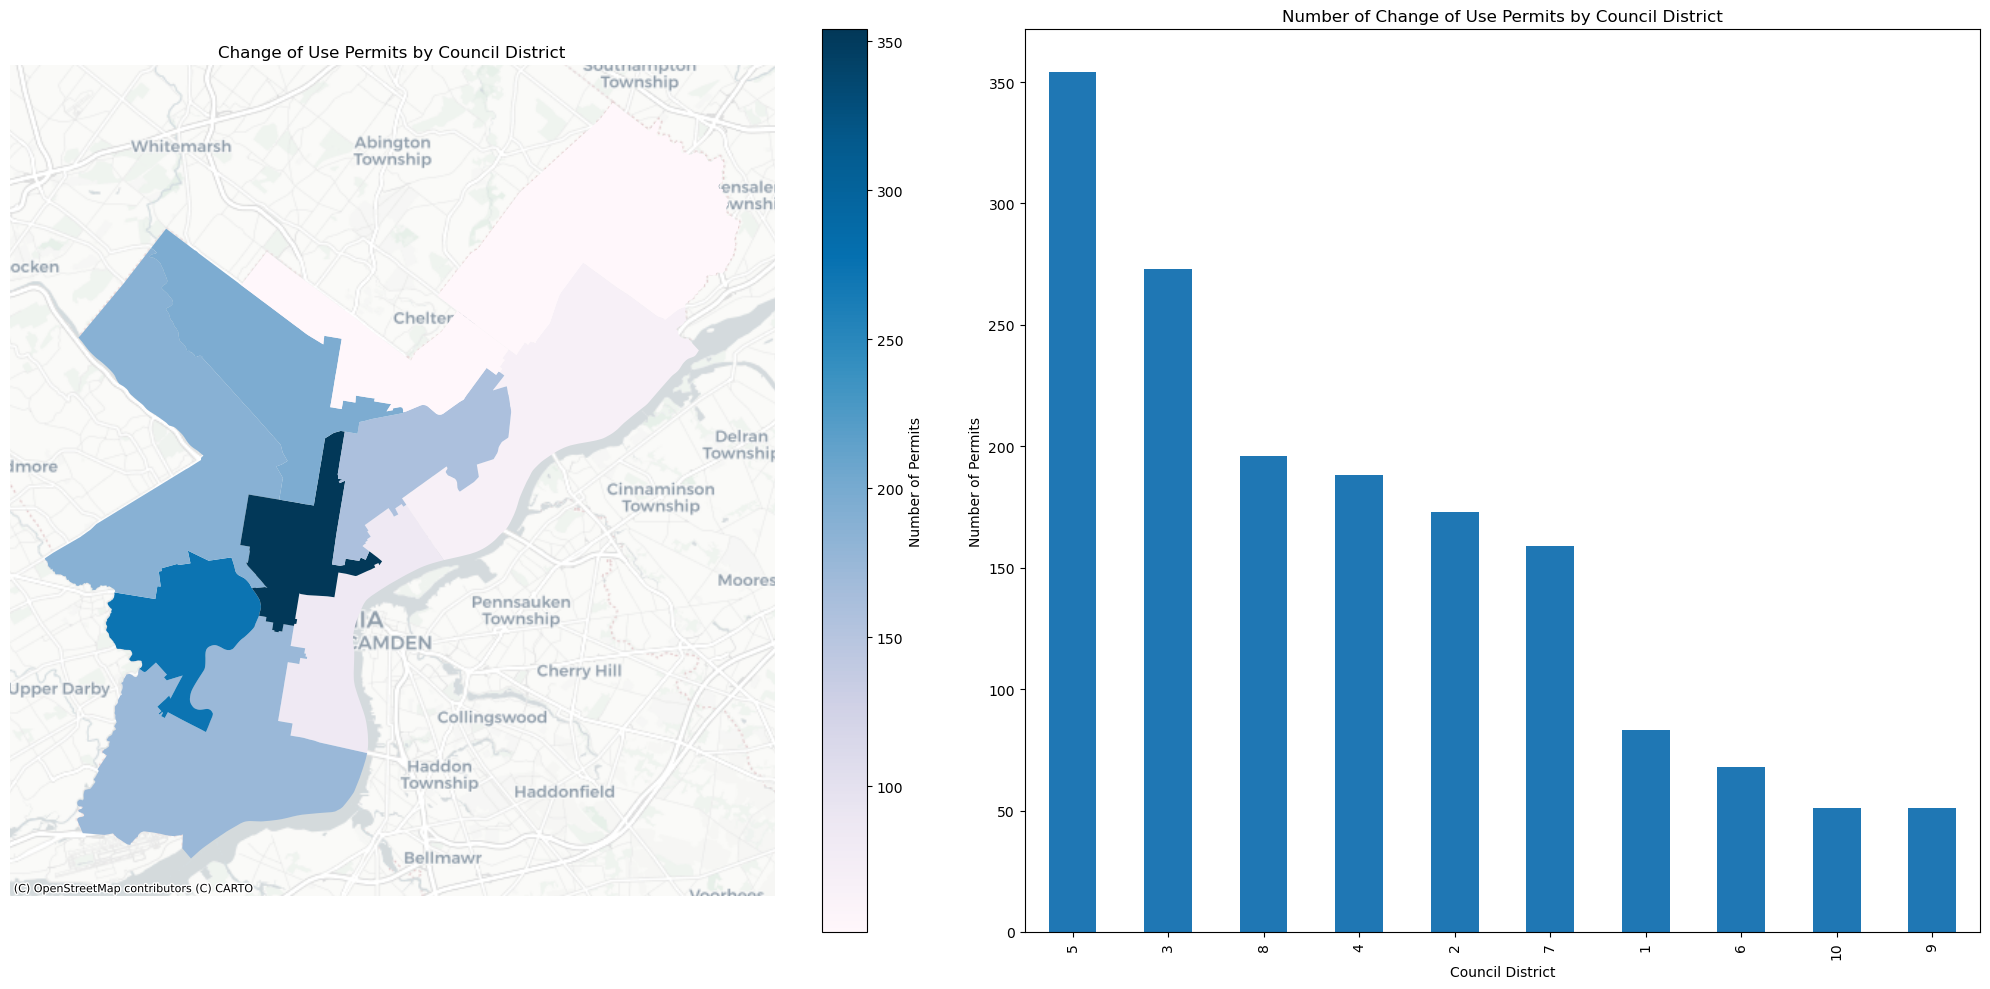

In [16]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(permits['longitude'], permits['latitude'])]
permits_gdf = gpd.GeoDataFrame(permits, geometry=geometry, crs="EPSG:4326")

districts = districts.to_crs(permits_gdf.crs)

# Spatial join permit data & council district data
permits_cc = gpd.sjoin(permits_gdf, districts, how="left", predicate="within")
permits_per_district = permits_cc.groupby('DISTRICT')['permitnumber'].count().sort_values(ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

merged_data = districts.merge(permits_per_district, left_on='DISTRICT', right_index=True)
merged_data = merged_data.to_crs(epsg=3857)
merged_data.plot(column='permitnumber', 
                ax=ax1,
                legend=True,
                cmap='PuBu',
                legend_kwds={'label': 'Number of Permits'},
                missing_kwds={'color': 'lightgrey'})

# Basemap
ctx.add_basemap(ax1, source=ctx.providers.CartoDB.Positron)
ax1.set_axis_off()
ax1.set_title('Change of Use Permits by Council District')

# Bar chart of change of use permits by district
permits_per_district.plot(kind='bar', ax=ax2)
ax2.set_title('Number of Change of Use Permits by Council District')
ax2.set_xlabel('Council District')
ax2.set_ylabel('Number of Permits')

plt.tight_layout()
plt.show()

### Zoning Appeals - Variances for Multi-Family

In [2]:
pd.set_option("display.max.columns", None)
base_url2 = "https://phl.carto.com/api/v2/sql"
query2 = """
SELECT * FROM appeals
"""

params2 = {
    "q":query2
}

results2 = requests.get(base_url2, params2)

data2 = results2.json()

appeals = pd.DataFrame(data2['rows'])

appeals.head()

cartodb_id                                           the_geom  \
0           1  0101000020E61000009A66D30997C952C0FD1B17823CF9...   
1           2  0101000020E61000006C4C4BA2C4C652C02F2BB29A2704...   
2           3  0101000020E6100000DC2903E74FCA52C07711DCA62FF9...   
3           4  0101000020E610000032D60399BDC852C03B703BC5E5FC...   
4           5  0101000020E6100000B8845553CFCA52C0CCDA9A6577F9...   

                                the_geom_webmercator  objectid  \
0  0101000020110F00005A55059592E95FC11EDA01A36688...         1   
1  0101000020110F00008D186981C7E45FC1BCF3D20C8194...         2   
2  0101000020110F000060CC9C97CCEA5FC18327E8645888...         3   
3  0101000020110F00004EFCBC3C21E85FC163A76B2D758C...         4   
4  0101000020110F000069ED8208A5EB5FC10D0846E0A788...         5   

  addressobjectid                address unit_type unit_num         zip  \
0          593815       500-06 WALNUT ST      None     None  19106-3711   
1            2795          799 ADAMS AVE      None     None  19124-2327   
2          547064         1201 SPRUCE ST      None     None  19107-5603   
3          754561  150 CECIL B MOORE AVE      None     None  19122-0000   
4          397995         1629 LOCUST ST      None     None  19103-6304   

  opa_account_num parcel_id_num censustract               opa_owner  \
0       888501268         99332       10.01  500 WALNUT PARTNERS LP   
1       882051160        540184         291          OH SAVINA SOOK   
2       881517950        221809        9.01      1201 SPRUCE ST L P   
3       183013005        540264         157  DESIGN HOLDINGS II LLC   
4       883046300        232156        8.04  ST MARKS ASSOCIATES LP   

         primaryappellant appellanttype  internaljobid appealnumber  \
0    THOMAS P. WITT, ESQ.         OTHER      1510357.0       051499   
1          UAM (JOHN) PAK         OTHER      1015278.0        10001   
2  REED D. LYONS, ESQUIRE         OTHER      1015303.0        10002   
3  JEFFERY SPANN, ESQUIRE         OTHER      1015336.0        10003   
4        LISA WORTHINGTON          APPL      1015346.0        10004   

  acceleratedappeal           createddate         completeddate  \
0              None  2013-02-25T21:11:00Z                  None   
1              None  2009-09-10T18:42:00Z                  None   
2              None  2009-09-10T19:03:07Z  2009-10-30T14:48:30Z   
3              None  2009-09-10T20:01:16Z  2009-12-10T22:04:51Z   
4              None  2009-09-11T12:31:33Z                  None   

                                       relatedpermit relatedcasefile  \
0  Description of Project:  050812081\n  APPEAL T...            None   
1  Description of Project:  233776\n  APPEAL TYPE...            None   
2  Description of Project:  234210\n  APPEAL TYPE...            None   
3  Description of Project:  231549\n  APPEAL TYPE...            None   
4  Description of Project:  210340\n  APPEAL TYPE...            None   

  appealstatus appealtype agendadescription applicationtype meetingnumber  \
0         OPEN       None              None          RB_ZBA          None   
1         OPEN       None              None          RB_ZBA          None   
2       CLOSED       None              None          RB_ZBA          None   
3       CLOSED       None              None          RB_ZBA          None   
4       CLOSED       None              None         RB_LIRB          None   

                                       appealgrounds         scheduleddate  \
0  PERMIT FOR THE RELOCATION OF LOT LINES TO CREA...  2006-02-08T17:30:00Z   
1  PERMIT FOR RETAIL AND WHOLE SALE DISTRIBUTION ...  2009-10-28T18:00:00Z   
2  PERMIT FOR THE ERECTION OF A ROOF DECK LESS TH...  2009-10-21T18:00:00Z   
3  PERMIT FOR LEGALIZATION OF THE ERECTION OF FOU...  2009-10-21T18:00:00Z   
4                        ESTOPPEL, HISTORIC BUILDING  2009-12-15T18:15:00Z   

       decision meetingresult  \
0  GRANTED/PROV          None   
1       GRANTED          None   
2  GRANTED/PROV          

In [18]:
# First, combine appeal grounds and permit description for better coverage
appeals['combined_text'] = appeals['appealgrounds'].fillna('') + ' ' + appeals['relatedpermit'].fillna('')

# Update housing types to include more variations
housing_types = [
    "multi-family", "multifamily", "multi family",
    "two-family", "two family",
    "three-family", "three family",
    "multiple family", "dwelling units",
    "apartments", "units"
]

# Add conversion-specific terms
conversion_terms = [
    "convert", "conversion", "change of use",
    "from single family", "from one family"
]

# Modify exclude terms to be more specific
exclude_terms = [
    "existing multi", "current multi", 
    "previously approved multi",
    "established multi"
]

# First filter for variance requests
appeals = appeals[
    (appeals['appealtype'] == 'ZBA Permit Denial - Variance')
]

# Then look for conversion language
conversion_filter = appeals["combined_text"].str.contains(
    '|'.join(conversion_terms), 
    case=False, 
    na=False
)

# Look for multi-family terms
multi_unit_filter = appeals["combined_text"].str.contains(
    '|'.join(housing_types), 
    case=False,  
    na=False
)

# Exclude existing multi-family
exclude_filter = ~appeals["combined_text"].str.contains(
    '|'.join(exclude_terms), 
    case=False, 
    na=False
)

# Apply all filters
appeals = appeals[conversion_filter & multi_unit_filter & exclude_filter]

appeals.head()

cartodb_id                                           the_geom  \
226           227  0101000020E6100000CD767431D6C752C0A29F8D4EF7FD...   
21906       21907  0101000020E6100000199F2695A1CA52C0C351150806FE...   
24654       24655  0101000020E6100000A176A60883CA52C0521269322CF7...   
24881       24882  0101000020E610000044A992A0F8CA52C0613A6842F7F7...   
29603       29604  0101000020E6100000296EC083D6CA52C0E718DF9FEE05...   

                                    the_geom_webmercator  objectid  \
226    0101000020110F0000CA60622C98E65FC107767D5AA48D...       215   
21906  0101000020110F0000763F965557EB5FC1D9AFBEACB48D...     21578   
24654  0101000020110F0000F9FCAD7123EB5FC12564C36D1D86...     24379   
24881  0101000020110F0000FEB83830EBEB5FC14D880658FE86...     24601   
29603  0101000020110F0000375EA53EB1EB5FC11C8288D07996...     29314   

      addressobjectid            address unit_type unit_num         zip  \
226          15461807   2139 E HAROLD ST      None     None  19125-1413   
21906       131141425   1943 W NORRIS ST      None     None  19121-2227   
24654       135689913     1501 S 12TH ST      None     None  19147-6201   
24881       134309625  1628 ELLSWORTH ST      None     None  19146-3010   
29603       127810818   5918 MCMAHON AVE      None     None  19144-1116   

      opa_account_num  ...          meetingresult proviso  \
226         314183300  ...                Granted    None   
21906       321156800  ...  Dismissed / Withdrawn    None   
24654       871035600  ...                   None    None   
24881       365274600  ...               Complete    None   
29603       592292400  ...               Complete    None   

               decisiondate systemofrecord     geocode_x      geocode_y  \
226    2021-07-13T17:18:47Z        ECLIPSE  2.704699e+06  248021.922158   
21906  2021-12-09T17:22:29Z        ECLIPSE  2.692464e+06  247824.570440   
24654                  None        ECLIPSE  2.693557e+06  228350.824639   
24881  2020-09-09T01:25:11Z        ECLIPSE  2.691479e+06  230548.462644   
29603  2020-12-03T15:38:04Z        ECLIPSE  2.690901e+06  270295.951203   

      council_district posse_jobid  \
226                  1   191680619   
21906                5   195389917   
24654                1   195390146   
24881                2   195390301   
29603                8   279881231   

                                     coordinatingrco  \
226            East Kensington Neighbors Association   
21906                                           None   
24654                                           None   
24881                                           None   
29603  Chew and Belfield Neighbors Club Incorporated   

                                           combined_text  
226    PERMIT FOR The proposed Change of USE to an ex...  
21906  PERMIT FOR TO CONVERT AN EXISTING SINGLE FAMIL...  
24654  PERMIT FOR CONVERT A SINGLE-FAMILY HOUSHOLD LI...  
24881  PERMIT FOR CONVERT A SINGLE-FAMILY HOUSEHOLD L...  
29603  PERMIT  IS FOR THE REMOVAL OF AN EXISTING PRIV...  

[5 rows x 40 columns]

In [19]:
print("Sample of new construction appeals (excluding existing):")
print(appeals['appealgrounds'].head())
print("\nTotal number of appeals:", len(appeals))

Sample of new construction appeals (excluding existing):
226      PERMIT FOR The proposed Change of USE to an ex...
21906    PERMIT FOR TO CONVERT AN EXISTING SINGLE FAMIL...
24654    PERMIT FOR CONVERT A SINGLE-FAMILY HOUSHOLD LI...
24881    PERMIT FOR CONVERT A SINGLE-FAMILY HOUSEHOLD L...
29603    PERMIT  IS FOR THE REMOVAL OF AN EXISTING PRIV...
Name: appealgrounds, dtype: object

Total number of appeals: 46


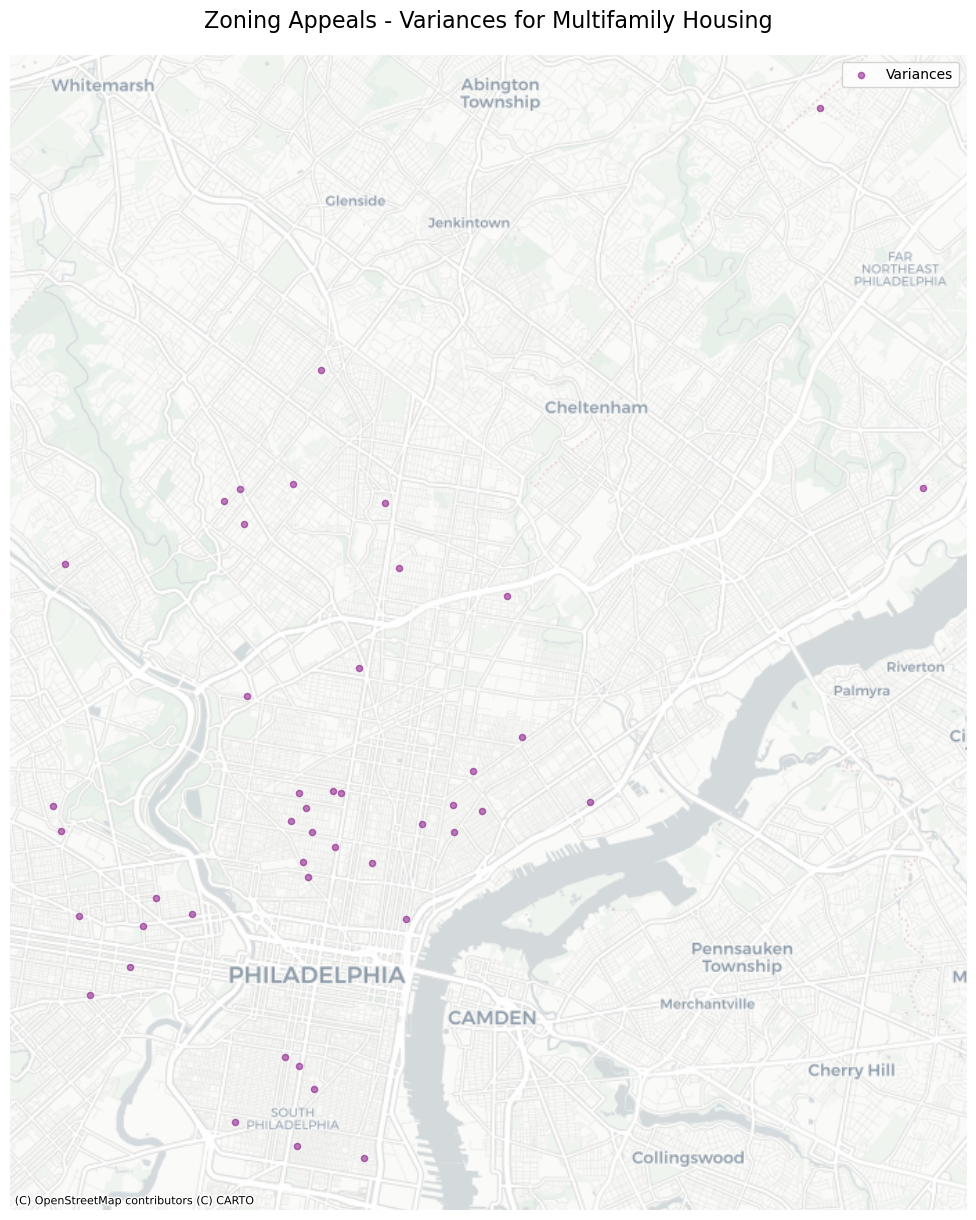

In [20]:
appeals['longitude'], appeals['latitude'] = transformer.transform(
    appeals['geocode_x'].values, 
    appeals['geocode_y'].values
)

geometry = [Point(xy) for xy in zip(appeals['longitude'], appeals['latitude'])]
appeals_gdf = gpd.GeoDataFrame(appeals, geometry=geometry, crs="EPSG:4326")

fig, ax = plt.subplots(figsize=(15, 15))

appeals_gdf = appeals_gdf.to_crs(epsg=3857)

appeals_gdf.plot(ax=ax, 
             alpha=0.5, 
             c='purple',
             markersize=20,
             label='Variances')

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Plot customization
plt.title('Zoning Appeals - Variances for Multifamily Housing', fontsize=16, pad=20)
ax.set_axis_off()
plt.legend()

plt.show()

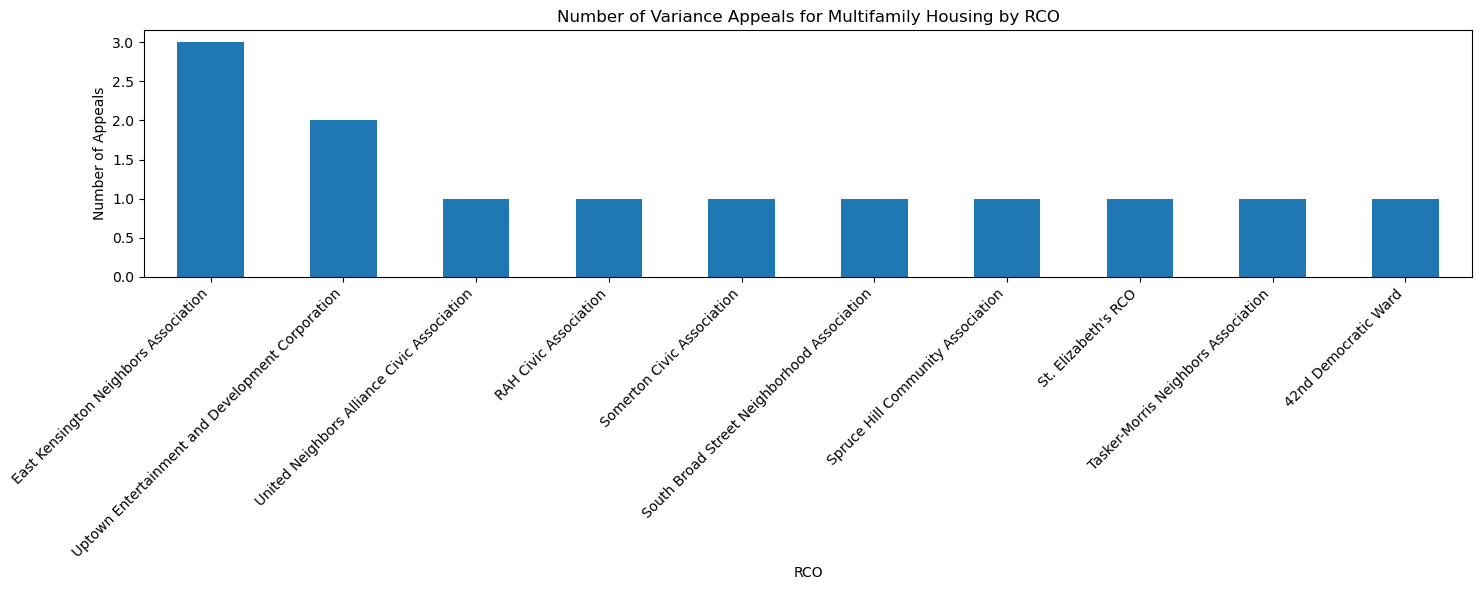

In [21]:
# Curious which RCOs have the most variance requests 
appeals_by_rco = appeals.groupby("coordinatingrco")['objectid'].count().sort_values(ascending=False).head(10) # Apparently there are a bunch of RCOs so only going to display top ten

appeals_by_rco.plot(kind='bar', figsize=(15, 6))
plt.title('Number of Variance Appeals for Multifamily Housing by RCO')
plt.xlabel('RCO')
plt.ylabel('Number of Appeals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Coming back to this because I feel like this doesn't make sense... Mantua is zoned for multifamily already not sure why they have that many variance requests - maybe should expand the filter parameters 

In [22]:
# Maybe explore properties dataset
base_url3 = "https://phl.carto.com/api/v2/sql"
query3 = """
SELECT * FROM opa_properties_public
"""

params3 = {
    "q":query3
}

results3 = requests.get(base_url3, params3)

data3 = results3.json()

props = pd.DataFrame(data3['rows'])

props.head()

cartodb_id                                           the_geom  \
0           1  0101000020E610000029C6C53D2BCC52C0DD31054E9CF7...   
1           2  0101000020E6100000B08BC01062CB52C0B80FFF2AA3FF...   
2           3  0101000020E61000001A1448DC39CB52C0DD45FFD4CBF4...   
3           4  0101000020E610000084BBFD1FCCCB52C0785516F4F9FE...   
4           5  0101000020E6100000D94623BCE3CA52C06001DBCC5EFB...   

                                the_geom_webmercator       assessment_date  \
0  0101000020110F0000D6E1D100F4ED5FC11AC63D999986...  2024-06-06T16:05:08Z   
1  0101000020110F0000F67827499EEC5FC1F75C95A67E8F...  2024-06-06T16:10:43Z   
2  0101000020110F000094715BFE59EC5FC164CB68B77B83...  2023-05-21T02:12:25Z   
3  0101000020110F0000150E447052ED5FC12914760FC38E...  2024-06-06T16:04:17Z   
4  0101000020110F00009EC95DB3C7EB5FC1430D34E8C38A...  2024-06-06T16:12:32Z   

  basements       beginning_point book_and_page building_code  \
0      None   SWC OF DICKINSON ST          None         SR      
1      None          NEC DOVER ST          None         SC      
2      None           NWC 16TH ST          None         T38     
3      None  343'7 1/8" W 31ST ST          None         SR      
4      None     197' W OF 19TH ST          None         ZL0     

   building_code_description category_code  ... utility view_type year_built  \
0  VACANT LAND RESIDE < ACRE            6   ...    None         I       None   
1  VACANT LAND COMMER < ACRE            6   ...    None         I       None   
2  ROW B/OFF-STR 2 STY STONE            3   ...    None         I       1950   
3  VACANT LAND RESIDE < ACRE            6   ...    None         I       None   
4  MISC FUNERAL HOME MASONRY            4   ...    None         A       1920   

  year_built_estimate zip_code  zoning         pin  building_code_new  \
0                None    19146    RSA5  1001202566               None   
1                None    19132    CMX1  1001321879               None   
2                None    19145    CMX1  1001408261                820   
3                None    19132    RSA5  1001168670               None   
4                None    19130     RM1  1001494378                246   

  building_code_description_new   objectid  
0                          None  589908380  
1                          None  589908381  
2  ROW MIXED-COM/RES-BLT AS RES  589908382  
3                          None  589908383  
4                  FUNERAL HOME  589908384  

[5 rows x 81 columns]

In [23]:
props.columns

Index(['cartodb_id', 'the_geom', 'the_geom_webmercator', 'assessment_date',
       'basements', 'beginning_point', 'book_and_page', 'building_code',
       'building_code_description', 'category_code',
       'category_code_description', 'census_tract', 'central_air',
       'cross_reference', 'date_exterior_condition', 'depth',
       'exempt_building', 'exempt_land', 'exterior_condition', 'fireplaces',
       'frontage', 'fuel', 'garage_spaces', 'garage_type',
       'general_construction', 'geographic_ward', 'homestead_exemption',
       'house_extension', 'house_number', 'interior_condition', 'location',
       'mailing_address_1', 'mailing_address_2', 'mailing_care_of',
       'mailing_city_state', 'mailing_street', 'mailing_zip', 'market_value',
       'market_value_date', 'number_of_bathrooms', 'number_of_bedrooms',
       'number_of_rooms', 'number_stories', 'off_street_open',
       'other_building', 'owner_1', 'owner_2', 'parcel_number', 'parcel_shape',
       'quality_grade'

## Granted Appeals

In [ ]:
decision = ['GRANTED', 'GRANTED/PROV', 'Complete', 'AFFIRMED', 'APPROVED', 'City Affirmed', 'Granted', 'SUSTAINED', 'CONTINUED' ,'Approved','Sustained',
            'Continued']
appeals = appeals[appeals['decisiondate'].notna()]
appeals['parcel_id_num'] = pd.to_numeric(appeals['parcel_id_num'], errors='coerce')
appeals = appeals[appeals['parcel_id_num'].notna()]
appeals['parcel_id_num'] = appeals['parcel_id_num'].astype(int)

approved_appeals = appeals[appeals['decision'].isin(decision)]
approved_appeals.head()

In [ ]:
#now get zoning values
zoning = ['RB_ZBA', 'Zoning Board of Adjustment']

zoning_appeals = approved_appeals[
    appeals['applicationtype'].isin(zoning)
]

zoning_appeals.head()

In [ ]:
apealscomplete = appeals[appeals['parcel_id_num'].isin(zoning_appeals['parcel_id_num'])].groupby('parcel_id_num')['decisiondate'].max().reset_index()
apealscomplete = apealscomplete.rename(columns={'decisiondate': 'conscomplete'})
apealscomplete.head()

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

geo_subset = appeals[['parcel_id_num', 'the_geom', 'decisiondate']].drop_duplicates('parcel_id_num')
finishappealsf = apealscomplete.merge(
    geo_subset[['parcel_id_num', 'the_geom']], 
    on='parcel_id_num', 
    how='left'
)


gdf = gpd.GeoDataFrame(finishappealsf,  geometry=gpd.GeoSeries.from_wkb(finishappealsf["the_geom"]), crs=4326)


# Create the map
fig, ax = plt.subplots(figsize=(12, 10))

# Plot points colored by completion year
gdf.plot(
    cmap='viridis',
    legend=True,
    ax=ax,
    markersize=20,
    alpha=0.7
)

# Add title and labels
plt.title('Appeals in Philadelphia by Completion Year', fontsize=15)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import contextily as ctx

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

gdf_projected = gdf.to_crs('EPSG:3857')

# Get the coordinates for the KDE
x = gdf_projected.geometry.x
y = gdf_projected.geometry.y

# Create a custom colormap (from light to dark blue)
colors = ["#f7fbff", "#deebf7", "#c6dbef", "#9ecae1", "#6baed6", "#4292c6", "#2171b5", "#08519c", "#08306b"]
cmap = LinearSegmentedColormap.from_list("blue_density", colors)

# Create and plot the KDE
kde = sns.kdeplot(
    x=x, 
    y=y,
    fill=True,
    alpha=0.8,
    cmap=cmap,
    levels=15,
    thresh=0.05,
    ax=ax
)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()
ax.set_title('Zoning Appeal Density in Philadelphia')

In [ ]:
districts = gpd.read_file('https://opendata.arcgis.com/api/v3/datasets/1ba5a5d68f4a4c75806e78b1d9245924_0/downloads/data?format=geojson&spatialRefId=4326&where=1%3D1')
appeals_dist = gpd.sjoin(gdf, districts, how='left', predicate='intersects')
dist_appeals = appeals_dist.groupby('DISTRICT').size().reset_index(name='count')
dist_appeals.head()

In [ ]:
from shapely.geometry import Point
import contextily as ctx

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

merged_data = districts.merge(dist_appeals, on='DISTRICT', how='left')
merged_data = merged_data.to_crs(epsg=3857)
merged_data.plot(column='count', 
                ax=ax1,
                legend=True,
                cmap='PuBu',
                legend_kwds={'label': 'Number of Appeals'},
                missing_kwds={'color': 'lightgrey'})

# Basemap
ctx.add_basemap(ax1, source=ctx.providers.CartoDB.Positron)
ax1.set_axis_off()
ax1.set_title('Zoning Appeals by District')

# Bar chart of change of use permits by district
dist_appeals.plot(kind='bar', ax=ax2)
ax2.set_title('Number of Zoning Appeals by Districts')
ax2.set_xlabel('Council District')
ax2.set_ylabel('Number of Appeals')

plt.tight_layout()
plt.show()